# Crop-Prediction for Urban Farming in Milan

In [107]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
import matplotlib.pyplot as plt

In [108]:
# Read crops dataset 
df=pd.read_csv('/kaggle/input/preprocessed-700-crops/preprocessed_700.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23800 entries, 0 to 23799
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             23800 non-null  object 
 1   Fertility        23800 non-null  object 
 2   Photoperiod      23800 non-null  object 
 3   N-P-K Ratio      23800 non-null  object 
 4   Temperature      23800 non-null  float64
 5   Rainfall         23800 non-null  float64
 6   pH               23800 non-null  float64
 7   Light_Hours      23800 non-null  float64
 8   Light_Intensity  23800 non-null  float64
 9   Rh               23800 non-null  float64
 10  Nitrogen         23800 non-null  float64
 11  Phosphorus       23800 non-null  float64
 12  Potassium        23800 non-null  float64
 13  Yield            23800 non-null  float64
 14  Category_pH      23800 non-null  object 
 15  Soil_Type        23800 non-null  object 
 16  Season           23800 non-null  object 
dtypes: float64(1

In [109]:
df_copy = df.copy()
df_copy.head()

,Name,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season
0,Apple,High,Day Neutral,10:10:10,21.063204,1932.402709,6.567764,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,12.847482,low_acidic,Sandy Loam,Fall
1,Apple,High,Day Neutral,10:10:10,19.511305,1589.295994,6.784538,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,13.894292,neutral,Sandy Loam,Fall
2,Apple,High,Day Neutral,10:10:10,23.045662,1269.789133,6.619155,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,13.372204,low_acidic,Sandy Loam,Fall
3,Apple,High,Short Day Period,10:10:10,17.986016,1944.180144,6.638623,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,11.801568,neutral,Sandy Loam,Spring
4,Apple,High,Day Neutral,10:10:10,23.775354,1790.352815,6.654898,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,10.660521,neutral,Sandy Loam,Fall


In [110]:
df_ = df.select_dtypes(exclude=['int', 'float'])
print('Categorical Columns:')
print()
for col in df_.columns:
    print(df_[col].value_counts()) # to print count of every category
    print("\n")

Categorical Columns:

Name
Apple             700
Eggplants         700
Endive            700
Kale              700
Lettuce           700
Radicchio         700
Spinach           700
Tomatoes          700
Asparagus         700
Orange            700
Chilli Peppers    700
Cabbage           700
Cucumbers         700
Potatoes          700
Cauliflowers      700
Broccoli          700
Cress             700
Chard             700
Beet              700
Arugula           700
plum              700
pear              700
apricot           700
Grapes            700
Watermelon        700
Kiwi              700
Lemon             700
Cherries          700
Figs              700
Strawberry        700
Blueberry         700
Peach             700
Pomegranate       700
Green Peas        700
Name: count, dtype: int64


Fertility
High        14000
Moderate     9800
Name: count, dtype: int64


Photoperiod
Short Day Period    15792
Day Neutral          6943
Long Day Period      1065
Name: count, dtype: int64


N-P-K

* Dropping N-P-K Ratio and pH values as we have features Category_pH and individual Nitrogen, Phosphorous and Potassium levels

In [111]:
df.drop(["pH"],axis='columns', inplace=True)
df.head(5)

,Name,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season
0,Apple,High,Day Neutral,10:10:10,21.063204,1932.402709,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,12.847482,low_acidic,Sandy Loam,Fall
1,Apple,High,Day Neutral,10:10:10,19.511305,1589.295994,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,13.894292,neutral,Sandy Loam,Fall
2,Apple,High,Day Neutral,10:10:10,23.045662,1269.789133,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,13.372204,low_acidic,Sandy Loam,Fall
3,Apple,High,Short Day Period,10:10:10,17.986016,1944.180144,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,11.801568,neutral,Sandy Loam,Spring
4,Apple,High,Day Neutral,10:10:10,23.775354,1790.352815,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,10.660521,neutral,Sandy Loam,Fall


In [112]:
# Drop the Yield Column as its not relevant for Crop selection
df.drop('Yield', axis=1, inplace=True)

In [113]:
df_target = df['Name'].to_frame()
df_target

,Name
0,Apple
1,Apple
2,Apple
3,Apple
4,Apple
...,...
23795,Green Peas
23796,Green Peas
23797,Green Peas
23798,Green Peas


In [114]:
#Separate target from Predictors
df.drop('Name', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23800 entries, 0 to 23799
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fertility        23800 non-null  object 
 1   Photoperiod      23800 non-null  object 
 2   N-P-K Ratio      23800 non-null  object 
 3   Temperature      23800 non-null  float64
 4   Rainfall         23800 non-null  float64
 5   Light_Hours      23800 non-null  float64
 6   Light_Intensity  23800 non-null  float64
 7   Rh               23800 non-null  float64
 8   Nitrogen         23800 non-null  float64
 9   Phosphorus       23800 non-null  float64
 10  Potassium        23800 non-null  float64
 11  Category_pH      23800 non-null  object 
 12  Soil_Type        23800 non-null  object 
 13  Season           23800 non-null  object 
dtypes: float64(8), object(6)
memory usage: 2.5+ MB


## Split dataset into train and test set

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.20, random_state=42)

len(X_train), len(X_test)



(19040, 4760)

In [116]:
X_train.head()

,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Category_pH,Soil_Type,Season
10448,Moderate,Long Day Period,10:10:10,20.663673,999.537984,12.419979,352.962624,91.087684,113.139649,252.944092,234.112895,acidic,Loam,Summer
3829,Moderate,Short Day Period,10:10:10,18.216410,830.790702,13.224105,476.467441,92.934905,180.425725,116.302324,236.021310,low_acidic,Loam,Spring
5259,High,Short Day Period,10:10:05,29.786036,1772.225842,13.074305,217.927973,91.784408,94.258877,53.769354,131.226300,low_acidic,Loam,Summer
6480,High,Day Neutral,10:10:10,28.797606,1117.929456,12.637688,731.395266,92.734920,201.386599,150.492864,52.203201,neutral,Sandy Loam,Winter
4199,Moderate,Short Day Period,10:10:10,17.179926,704.313825,12.731825,500.769106,92.880961,159.190886,119.149946,240.222999,low_acidic,Loam,Spring


## Using Decision Tree Classifier

In [117]:
# One-hot encoding our data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

column_transformer = make_column_transformer(
    (OneHotEncoder(), ['Fertility', 'Photoperiod', 'N-P-K Ratio', 'Category_pH', 'Soil_Type', 'Season']),
    remainder='passthrough')

X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names_out())

# # Save the column_transformer object
# with open('column_transformer.pkl', 'wb') as file:
#     pickle.dump(preprocessor, file)

# # Load the preprocessor object
# with open('column_transformer.pkl', 'rb') as file:
#     loaded_preprocessor_obj = pickle.load(file)

X_test = column_transformer.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=column_transformer.get_feature_names_out())

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9993697478991597


In [118]:
# Creating a dictionary of parameters to use in GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

# Bundle preprocessing and modeling code in a pipeline
# my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
# #                               ('model', clf)
#                              ])
clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'splitter': 'random'}


In [119]:
clf = DecisionTreeClassifier(max_depth=10, criterion='entropy', max_features=None, splitter='random')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(accuracy_score(y_test, predictions))


0.9991596638655462


## Using RandomForest Classifier Model

In [120]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
# clf.fit(X_train, np.ravel(y_train,order="c"))
rand_clf.fit(X_train, np.ravel(y_train))

RandomForestClassifier()

In [121]:
rand_clf.score(X_test, y_test)

1.0

In [122]:
from sklearn.metrics import classification_report

y_pred = rand_clf.predict(X_test)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

         Apple       1.00      1.00      1.00       139
       Arugula       1.00      1.00      1.00       128
     Asparagus       1.00      1.00      1.00       147
          Beet       1.00      1.00      1.00       140
     Blueberry       1.00      1.00      1.00       159
      Broccoli       1.00      1.00      1.00       130
       Cabbage       1.00      1.00      1.00       135
  Cauliflowers       1.00      1.00      1.00       136
         Chard       1.00      1.00      1.00       156
      Cherries       1.00      1.00      1.00       134
Chilli Peppers       1.00      1.00      1.00       149
         Cress       1.00      1.00      1.00       136
     Cucumbers       1.00      1.00      1.00       152
     Eggplants       1.00      1.00      1.00       139
        Endive       1.00      1.00      1.00       138
          Figs       1.00      1.00      1.00       148
        Grapes       1.00      1.00      1.00  

In [123]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

## Using KNN classifier


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Accuracy Score')

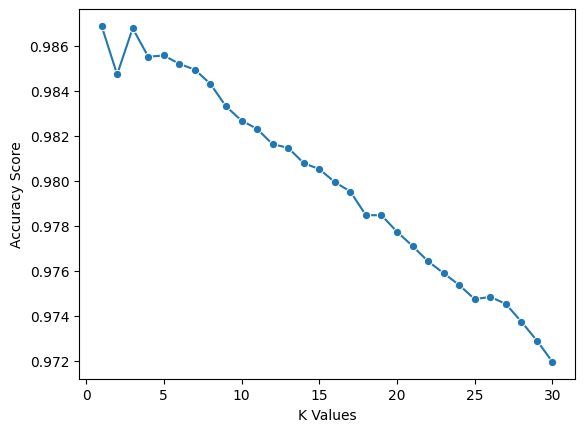

In [124]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
import seaborn as sns

neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# # Loop over K values 
# for i, k in enumerate(neighbors): 
#     knn = KNeighborsClassifier(n_neighbors=k) 
#     knn.fit(X_train, y_train) 
    
k_values = [i for i in range (1,31)]
scores = []

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, np.ravel(y_train), cv=5)
    scores.append(np.mean(score))
    
# # Compute training and test data accuracy 
#     train_accuracy[i] = knn.score(X_train, y_train) 
#     test_accuracy[i] = knn.score(X_test, y_test) 

# # Generate plot 
# plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
# plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 

# plt.legend() 
# plt.xlabel('n_neighbors') 
# plt.ylabel('Accuracy') 
# plt.show() 

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [125]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=1)

In [126]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy)


Accuracy: 0.9901260504201681
